In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os
import cv2


from sklearn.preprocessing import normalize

In [2]:
HOME="/home/spoudel/PR_assignments/assignments_3/Faces_FA_FB/"
fa_H="fa_H"
fa_L="fa_L"
fb_H="fb_H"
fa_L="fa_L"

training_location=HOME+"/"+fa_H
testing_location=HOME+"/"+fb_H

In [3]:
training_images_name=[]
for file in os.listdir(training_location):
    if file.endswith(".pgm"):
        training_images_name.append(file)

len(training_images_name),training_images_name
data_id=np.array([x[:5] for x in training_images_name])
data_id

array(['00476', '00611', '00029', ..., '00790', '00877', '00465'],
      dtype='<U5')

In [4]:
training_images=np.array([cv2.imread(training_location+"/"+x) for x in training_images_name])

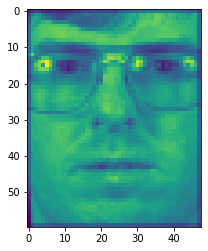

In [5]:
# plt.imshow(training_images[0])
plt.imshow(training_images[0][:,:,0])
# training_images[0].shape[-1], training_images[0][:,:,2].shape, training_images[0]


# plt.imshow(training_images[0].flatten().reshape(60,48,3))

In [6]:
training_images[:,:,:,0].shape

(1204, 60, 48)

In [7]:
np.append(10,training_images[-10:].shape)

array([10, 10, 60, 48,  3])

In [8]:
# def PCA1(data):
#     X=data.copy()
#     meanx=np.mean(X,axis=0)
#     stdx=np.std(X,axis=0)
#     print(meanx.shape,stdx.shape)
    
    
#     def each_axis_pca(channel_data):
#         cov_mat=
    
    
    
#     return meanx,stdx

# meanx,stdx=each_axis_pca(training_images)
# plt.imshow((meanx/255))

In [9]:
class MyPCA:
    
    def __init__(self, information=None,n_components=10):
        self.n_components = n_components   
        self.information = information
        
    def find_components(self, input_data):        
        # Standardize data 
        X = input_data.copy()
        self.mean = np.mean(X[:,:,:,0], axis = 0)
        self.scale = np.std(X[:,:,:,0], axis = 0)
        print(self.mean.shape)
        
        # Eigendecomposition of covariance matrix    
        
        image_shape=X[0,:,:,0].shape
        print(image_shape)
        eigen_values=[]
        eigen_vectors=[]
        
        data=np.array([(image[:,:,0]-self.mean).flatten() for image in X]).T
        print("data shape",data.shape)
        trick_cov_mat = np.matmul(data.T,data)
        print("cov_mat shape",trick_cov_mat.shape)
        
        eig_vals, eig_vecs = np.linalg.eigh(trick_cov_mat) 
        eig_vecs=np.matmul(data,eig_vecs)
        
        print("size of calculated eigen vector", eig_vecs.shape)
        
        eig_vecs=np.array([v/ np.linalg.norm(v) for v in eig_vecs.T])   ## Converting to unit length
        print("shape of eigen vales and vectors",eig_vals.shape,"/t",eig_vecs.shape)
        
        eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i]) for i in range(len(eig_vals))]
        
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        print("shape_of_eigen_vectors",eig_vecs.shape)
        print("Eigen_vales_calculated",eig_vals_sorted)
        
        if self.information>1:
            self.information=self.information/100
        
        
        if self.information!=None:
            info_cumsum=np.cumsum(eig_vals_sorted)
            print("Total cumm sum is",info_cumsum[-1])
            
            info_cumsum_percent=np.array(info_cumsum)/info_cumsum[-1]
            print("Total infor cum sum is",info_cumsum_percent,"threshold",self.information)
            for i in range(len(info_cumsum)):
                if info_cumsum_percent[i]>=self.information:
                    print("loop infor cumm sum",info_cumsum_percent[i])
                    self.n_components=i
                    break
            print("n components is ",self.n_components)
                    
        self.components = eig_vecs_sorted[:self.n_components]
        largest_eigenfaces=eig_vecs_sorted[:10]
        smallest_eigenfaces=eig_vecs_sorted[-10:]
        reshape_to=np.append(10,image_shape)
#         print(self.mean.shape,largest_eigenfaces.shape)
        return self.mean.reshape(image_shape),largest_eigenfaces.reshape(reshape_to),smallest_eigenfaces.reshape(reshape_to)
    
    
#     def find_projection(self,x):
        
    
        
    def save_items_transformations(self,input_data):
        X=input_data.copy()
        X=np.array([(image[:,:,0]-self.mean).flatten() for image in X])
        print("X0",X[0])
        print("shape of components",self.components.shape,"shape of data data",X.shape)
        self.projections=np.matmul(X,self.components.T)        
        print("shape of projections",self.projections.shape,"projections 0",self.projections[0])
        
    def fit(self,input_data,data_id):
        self.data_id=data_id
        mean,largest_eigenfaces,smallest_eigenfaces=self.find_components(training_images)
        self.save_items_transformations(training_images)
        return mean,largest_eigenfaces,smallest_eigenfaces
    
    def distance_with_faces(self,x):
        print("size of projections in model",self.projections.shape, "shape of projection of single x",x.shape)
        distances=np.array([np.linalg.norm(a-x) for a in self.projections])
        print ("distances    ",distances.shape, distances)
        return distances
        
    def predict_a_face(self, item, r):
        P = item[:,:,0].copy()
        print(P.shape,self.mean.shape)
        P = (P - self.mean).flatten()
        print("P",P)
        print("shape of components",self.components.shape,"shape of 1 data",P.shape)
#         X_proj = np.matmul(X,self.components)
        P_proj=self.components.dot(P)
        print("projection shape",P_proj.shape,"projections",P_proj)
        
        distances=self.distance_with_faces(P_proj)
        print(len(distances))
        sorted_arg=np.argsort(distances)
        print(len(sorted_arg))
        args_to_see=sorted_arg[:r]
        print(r, len(args_to_see))
        print(args_to_see)
        return np.array([self.data_id[x] for x in args_to_see])
 
    
    def getMean(self):
        return self.mean
    
    def getComponents(self):
        return self.components
    
    def getProjections(self):
        return self.projections

In [10]:
PCA1=MyPCA(information=100)
mean,largest_eigenfaces,smallest_eigenfaces=PCA1.fit(training_images,data_id)
projections=PCA1.getProjections()

# # PCA1.getComponents().shape,mean.shape,largest_eigenfaces.shape,smallest_eigenfaces.shape,
# PCA1.save_items(training_images)

(60, 48)
(60, 48)
data shape (2880, 1204)
cov_mat shape (1204, 1204)
size of calculated eigen vector (2880, 1204)
shape of eigen vales and vectors (1204,) /t (1204, 2880)
shape_of_eigen_vectors (1204, 2880)
Eigen_vales_calculated [1.08869274e+09 2.67894203e+08 1.68943977e+08 ... 1.55537705e+03
 1.47170863e+03 9.95329915e-09]
Total cumm sum is 2793438889.1868763
Total infor cum sum is [0.38973208 0.4856333  0.54611215 ... 0.99999947 1.         1.        ] threshold 1.0
loop infor cumm sum 1.0
n components is  1202
X0 [-4.75830565 -5.04568106 -3.83305648 ...  2.61710963  1.7051495
 -0.47508306]
shape of components (1202, 2880) shape of data data (1204, 2880)
shape of projections (1204, 1202) projections 0 [ 1.03317432e+03  3.01382973e+02 -4.04991544e+01 ...  4.65540597e-03
 -4.28325999e-01  1.02947027e-01]


In [137]:
print(data_id[100])
predictions=PCA1.predict_a_face(training_images[0],15)
predictions

00602
(60, 48) (60, 48)
P [-4.75830565 -5.04568106 -3.83305648 ...  2.61710963  1.7051495
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.03317432e+03  3.01382973e+02 -4.04991544e+01 ...  4.65540597e-03
 -4.28325999e-01  1.02947027e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1.26607618e-12 2.20969650e+03 3.86753176e+03 ... 1.57170417e+03
 2.45817168e+03 1.71495738e+03]
1204
1204
15 15
[   0 1032  778   25  573  657  378   48  564 1196  245 1012  145  433
  419]


array(['00476', '00476', '00697', '00523', '00757', '00469', '00774',
       '00521', '00396', '00798', '00306', '00475', '00253', '00775',
       '00966'], dtype='<U5')

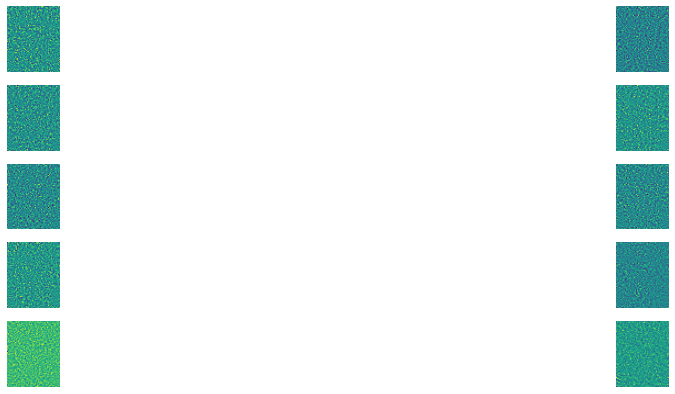

In [41]:
def show_multiple_images(images):
    rows=len(images)/2
    if rows%1>0:
        rows=rows+1
    columns=2
    fig = plt.figure(figsize=(4*rows, 7))
    
    for i in range(len(images)):
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, i+1)
        # showing image
        plt.imshow(images[i])
        plt.axis('off')
        
show_multiple_images(smallest_eigenfaces/255)

In [138]:
r=10
predictions=np.array([PCA1.predict_a_face(images,r) for images in training_images])

(60, 48) (60, 48)
P [-4.75830565 -5.04568106 -3.83305648 ...  2.61710963  1.7051495
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.03317432e+03  3.01382973e+02 -4.04991544e+01 ...  4.65540597e-03
 -4.28325999e-01  1.02947027e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1.26607618e-12 2.20969650e+03 3.86753176e+03 ... 1.57170417e+03
 2.45817168e+03 1.71495738e+03]
1204
1204
10 10
[   0 1032  778   25  573  657  378   48  564 1196]
(60, 48) (60, 48)
P [ -4.75830565  -8.04568106 -10.83305648 ...  -1.38289037  -4.2948505
  41.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-4.91589781e+02 -2.36977446e+02  3.58783182e+01 ...  1.01385713e+00
  2.52798351e+00 -3.91684430e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2.20969650e+03 7.56267317e-13 

distances     (1204,) [2314.03774807 1866.58457991 5379.39311318 ... 2075.13872867 1240.34540197
 2223.58023749]
1204
1204
10 10
[  20  236  200  976  215 1037 1090  820  764  928]
(60, 48) (60, 48)
P [  4.24169435   3.95431894   2.16694352 ...  -4.38289037 -27.2948505
 -34.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.58752019e+02 -2.69559871e+02  8.06582575e+00 ... -2.08039711e-01
  2.54380702e-01  4.57659056e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1675.32951956 1290.13551399 4708.58098429 ... 1160.32021436 1799.48075838
 1408.92008373]
1204
1204
10 10
[  21  868  760  765  322  790  378  746 1106  214]
(60, 48) (60, 48)
P [-15.75830565 -29.04568106 -30.83305648 ...  99.61710963  96.7051495
  58.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.08490828e+03 -1.92478454e+02  5.33054761e+02 ... -2.6

distances     (1204,) [2432.74028152 1436.72647006 5124.05548932 ... 1725.98648491 2087.9284718
 2036.83956165]
1204
1204
10 10
[  37 1094  256  210 1050  173 1068  414  449 1053]
(60, 48) (60, 48)
P [-12.75830565 -20.04568106 -20.83305648 ... -20.38289037 -38.2948505
 -25.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-9.33221372e+02 -7.78991852e+02  1.08477340e+03 ...  2.20008454e-01
  6.04608476e-01  2.14873696e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [3142.9121832  2145.93231081 6122.43913434 ... 2623.45134924 2598.88187269
 2831.59423234]
1204
1204
10 10
[  38  849  882  493  896 1100  766  684  668  665]
(60, 48) (60, 48)
P [13.24169435 17.95431894 17.16694352 ... 28.61710963 31.7051495
 14.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 8.95908804e+01  3.44319719e+02  2.03785261e+02 ... -3.09596500

projection shape (1202,) projections [ 1.69182077e+02  1.57819825e+02 -7.01464338e+02 ... -1.08190244e+00
  5.75210154e-01 -5.09305680e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2368.05320104 1915.80644378 4532.93326518 ... 2130.02017485 2457.3990227
 2457.15627313]
1204
1204
10 10
[  55 1136  117  348  802 1076   84  307  712  999]
(60, 48) (60, 48)
P [  2.24169435   2.95431894   1.16694352 ... -35.38289037 -46.2948505
 -30.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-4.97562798e+02 -4.92133271e+02  1.56143415e+02 ... -1.43587841e-01
  6.65375588e-01 -1.36681615e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2558.26951966 1551.25408126 5445.84878573 ... 1879.58477127 1968.03021499
 2200.68079791]
1204
1204
10 10
[  56  874  288 1106  882  713  567 1100  608  338]
(60, 48) (60, 48)
P [ -5.75830565 

distances     (1204,) [2608.0264569  1983.49757241 5333.78476309 ... 2209.27861506 2193.40830671
 2302.16568041]
1204
1204
10 10
[  72   30 1111  944  849  735 1023  476  822  133]
(60, 48) (60, 48)
P [ 13.24169435  18.95431894  12.16694352 ... -10.38289037 -15.2948505
 -11.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.22450298e+02  7.84837433e+01 -1.83053261e+01 ... -7.98509527e-01
 -1.03175431e-02  1.93747826e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1616.47329117 1602.59817266 4410.87311218 ...  984.50897681 2071.59115429
 1466.23342888]
1204
1204
10 10
[  73   68 1104  683   69   15  746  531  296 1107]
(60, 48) (60, 48)
P [  7.24169435  18.95431894  28.16694352 ... -32.38289037 -38.2948505
 -22.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.28953843e+03  3.75579652e+02 -1.22001524e+02 ... -1.9

distances     (1204,) [2380.93915442 1280.27137202 5426.87826413 ... 1952.81314617 1811.30263351
 2328.03883131]
1204
1204
10 10
[  90  993  278  406  469 1094  325  210 1085  242]
(60, 48) (60, 48)
P [-3.75830565 -5.04568106 -4.83305648 ... -3.38289037 -6.2948505
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.05740053e+02 -9.17546551e+02  4.24432880e+02 ... -4.34607373e-01
  1.06148734e+00  2.29450070e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2149.50622236 1666.12232495 4696.58821997 ... 1420.22638964 2405.70259999
 1534.67385204]
1204
1204
10 10
[  91  324  770  917  484  512 1091  143    6 1175]
(60, 48) (60, 48)
P [ -6.75830565 -17.04568106 -17.83305648 ...  25.61710963  31.7051495
  20.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 8.41713908e+02  4.65997184e+02 -3.59828564e+01 ...  2.3252923

distances     (1204,) [2011.76066298 1281.53884337 4907.12856513 ... 1439.97325631 1751.84216488
 1702.26191817]
1204
1204
10 10
[ 107 1094  414  840  349 1050  243  248 1108  249]
(60, 48) (60, 48)
P [ -3.75830565  -8.04568106  -9.83305648 ... -25.38289037 -27.2948505
 -19.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-823.40307721 -149.19202354 -377.14556566 ...   -1.0694854    -1.58464537
    1.46533317]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2425.43104699  963.43954828 5432.24097113 ... 1878.69681472 1789.5596521
 2401.15951051]
1204
1204
10 10
[ 108  685  600  360 1192  826  876  799  193 1057]
(60, 48) (60, 48)
P [-19.75830565 -32.04568106 -21.83305648 ...  -2.38289037  -8.2948505
  -8.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.08989387e+03  9.59341945e+01  2.81950508e+01 ... -1.12438189e+00
 

distances     (1204,) [1945.55800367 1523.42634851 4130.49503291 ... 1599.09100087 2414.04100568
 1837.74696886]
1204
1204
10 10
[ 125  148  613  120  758  598 1118  207  205 1098]
(60, 48) (60, 48)
P [ -2.75830565  -4.04568106  -5.83305648 ... -18.38289037 -17.2948505
 -11.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.25031490e+03  1.14117782e+03 -1.31564073e+02 ...  2.20933606e-01
  7.87660886e-01  1.16584324e+00]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2936.20881348 1946.39151428 5971.38254913 ... 2595.73809715 1973.57346552
 2870.64631755]
1204
1204
10 10
[ 126  353  569   71  295  825  785  816  769 1152]
(60, 48) (60, 48)
P [  2.24169435   0.95431894  -2.83305648 ... -15.38289037  17.7051495
  34.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-8.94332921e+02  2.73956590e+02 -1.93739205e+02 ...  2.4

distances     (1204,) [1622.50824983 1851.37472976 4159.58309644 ... 1082.87161611 2426.98392866
 1403.62127004]
1204
1204
10 10
[ 142  728  576  409  564  926  447  351  952 1201]
(60, 48) (60, 48)
P [-1.75830565 -6.04568106 -5.83305648 ... 21.61710963 16.7051495
  7.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.06085095e+02 -8.71891561e+02  6.61178158e+02 ...  1.40120040e+00
  2.21621997e-01 -2.78275939e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2226.45028322 1516.56781388 4962.60219448 ... 1452.33084817 2376.31287393
 1837.08556827]
1204
1204
10 10
[ 143  324  917  155  484  380 1185  209 1079  493]
(60, 48) (60, 48)
P [ -4.75830565  -9.04568106  -7.83305648 ... -33.38289037 -36.2948505
 -24.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-8.16899304e+02 -4.25810264e+02 -3.42729235e+02 ... -2.7866393

distances     (1204,) [1447.86317217 1595.84641082 4313.97542518 ...  981.82163524 1826.46810816
 1289.33820046]
1204
1204
10 10
[ 160  378  660  952  504  677  351  698  975 1116]
(60, 48) (60, 48)
P [-18.75830565 -31.04568106 -29.83305648 ... -26.38289037 -28.2948505
 -19.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.78572014e+03  2.92150296e+02  9.58204761e+00 ... -2.97600170e+00
  5.03489047e-01 -1.28462211e-02]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [4156.5937829  2626.69336686 7310.83264739 ... 3683.06174876 2584.89803763
 4017.62554204]
1204
1204
10 10
[ 161  490  817  334  241 1003  843  464  633  813]
(60, 48) (60, 48)
P [ -9.75830565 -16.04568106 -18.83305648 ... -20.38289037 -35.2948505
 -20.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.71842957e+03  6.01528195e+02  6.35321549e+02 ...  1.0

projection shape (1202,) projections [ 1.94090428e+02 -6.77020933e+02  3.20891937e+02 ...  9.49754325e-02
 -2.35002695e-01  1.09613537e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2627.97063327 2148.70135571 5097.80599077 ... 2064.32158311 2369.98346635
 1905.6544725 ]
1204
1204
10 10
[ 178  986  273   36  179  707 1000 1149  175  213]
(60, 48) (60, 48)
P [ 16.24169435  23.95431894  25.16694352 ...  10.61710963  -9.2948505
 -28.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.95026246e+02 -6.79525054e+02  4.33667479e+02 ... -3.11056149e-01
  2.44513061e-01 -1.65669711e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2459.77111664 2153.58604301 4777.50622271 ... 1901.5809117  2461.60068922
 1752.3123528 ]
1204
1204
10 10
[ 179  273  707  175  986  178 1176  898    9  272]
(60, 48) (60, 48)
P [ -8.75830565

distances     (1204,) [1651.30492467 1779.6327796  4307.16075008 ... 1316.42317294 2030.34134091
 1522.84556164]
1204
1204
10 10
[ 195  978  203  695  916 1125  677  591  370  542]
(60, 48) (60, 48)
P [-2.75830565  8.95431894 13.16694352 ...  1.61710963 -5.2948505
  4.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.07578452e+03  1.07466320e+02 -3.66846937e+01 ... -5.79575646e-01
 -4.06356850e-01  4.45700977e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1747.31618159 1966.53399242 3728.99074701 ... 1298.06232647 2468.03318977
 1415.2607533 ]
1204
1204
10 10
[ 196  290 1010  593  207  664  428 1027  948 1018]
(60, 48) (60, 48)
P [-10.75830565 -21.04568106 -20.83305648 ... -37.38289037 -43.2948505
 -27.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-9.71013117e+02 -2.86288408e+02 -3.41280639e+02 ... -3.3654087

distances     (1204,) [2057.50613182 1691.03252224 4661.64187207 ... 1546.15443615 1971.94257129
 1413.52244888]
1204
1204
10 10
[ 213  273  272    9 1159  322  927  267  220  437]
(60, 48) (60, 48)
P [ 5.24169435  9.95431894 12.16694352 ... -0.38289037 -5.2948505
  5.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.62639018e+02 -1.88014774e+02  4.73478500e+01 ...  8.46465719e-01
 -3.29252835e-01  1.16007412e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1686.11505952 1139.33072661 4639.84546583 ...  953.6099757  1832.01091462
 1494.84410105]
1204
1204
10 10
[ 214  790  746  893  174  760  457 1116  430  952]
(60, 48) (60, 48)
P [ 10.24169435  38.95431894  43.16694352 ... -20.38289037   4.7051495
  13.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-4.72367075e+02  8.50922289e+02  1.83711302e+02 ...  2.5009439

distances     (1204,) [1762.14623899 1221.39959885 4726.82533664 ... 1159.60221625 1612.43770198
 1481.76612706]
1204
1204
10 10
[ 230 1108  472  248  978  840  243  249  349   61]
(60, 48) (60, 48)
P [11.24169435 19.95431894 23.16694352 ...  4.61710963 31.7051495
 13.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.03163653e+02  6.19431600e+02  6.47254545e+01 ... -2.23474526e-01
 -4.27335043e-01  4.62767341e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1602.17976205 1806.61132301 4349.15048678 ... 1359.68083751 2035.95431839
 1341.5345322 ]
1204
1204
10 10
[ 231  516  621 1155  829  378 1036   70 1012  677]
(60, 48) (60, 48)
P [ -2.75830565  -2.04568106  -2.83305648 ... -20.38289037 -20.2948505
 -13.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-8.86588528e+02  7.88439750e+01 -2.47942585e+02 ...  7.5972412

distances     (1204,) [1959.80810093 1109.1311146  5057.62711517 ... 1398.54434423 1537.55324315
 1778.87877529]
1204
1204
10 10
[ 248  339  479  471  510  243  653 1114  349 1108]
(60, 48) (60, 48)
P [  4.24169435   9.95431894  12.16694352 ... -27.38289037 -29.2948505
 -18.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 209.55962866 -212.69998267 -410.89031259 ...    0.8683382     2.97561056
   -2.38486744]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1786.00854368 1445.82765298 4604.10720705 ... 1296.00556149 1763.98199544
 1411.96188193]
1204
1204
10 10
[ 249  472  139  230 1108 1039  136  840  757  322]
(60, 48) (60, 48)
P [20.24169435 32.95431894 33.16694352 ... 87.61710963 84.7051495
 50.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.63387999e+03  2.02723133e+02  6.87625081e+02 ... -9.34645422e-01
 -1.20

distances     (1204,) [1910.91519965 1648.89778452 4514.48165465 ... 1334.77148783 2107.66242785
 1454.68878667]
1204
1204
10 10
[ 266 1036  953 1162  441 1109  795  725  185 1155]
(60, 48) (60, 48)
P [ -1.75830565   3.95431894   5.16694352 ... -36.38289037 -29.2948505
  -4.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.22702165e+02 -4.57819932e+02 -1.82028212e+02 ...  4.31697758e-01
 -5.45561723e-01  3.19421981e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2212.06825634 1564.43100346 4860.31253945 ... 1467.32612422 1991.96384636
 1698.83634898]
1204
1204
10 10
[267 437  59   6 141 213 474 230 396 249]
(60, 48) (60, 48)
P [ 5.24169435  7.95431894 14.16694352 ... 10.61710963 19.7051495
 11.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.62911495e+02  3.08434441e+02  4.40754725e+01 ... -2.54619089e-02
  9.

distances     (1204,) [2338.57563392 1530.59678575 5192.52153981 ... 1914.90469433 1893.05889853
 2095.97492318]
1204
1204
10 10
[ 284  599  238  146  972  248 1053 1094  667 1126]
(60, 48) (60, 48)
P [ -1.75830565   3.95431894   6.16694352 ... -32.38289037 -44.2948505
 -25.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 417.02507466 -180.99202124  147.5633244  ...    0.62974787   -0.49595494
   -0.87030681]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1616.22832288 1560.96652288 4495.99443425 ... 1143.84875853 1982.54583519
 1373.23737761]
1204
1204
10 10
[285 868 375 351 760  21 378 631 893 433]
(60, 48) (60, 48)
P [-10.75830565 -19.04568106 -21.83305648 ... -31.38289037 -46.2948505
 -31.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 8.21043002e+02 -5.22634350e+02 -7.11739737e+01 ... -4.20424795e-01
  5.920950

distances     (1204,) [1834.51648431 1681.89615918 4581.79276658 ... 1306.5866548  2126.98065693
 1326.81271823]
1204
1204
10 10
[302 868 378 641 220 322 375  21 660 204]
(60, 48) (60, 48)
P [-10.75830565  -9.04568106  -0.83305648 ...  72.61710963  70.7051495
  42.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.05251441e+03 -4.25245946e+01  7.58288100e+01 ...  5.03761090e-01
 -4.88916214e-01 -2.80176356e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1754.32094771 2176.52905685 4095.7001628  ... 1419.6668606  2364.54308287
 1341.98164031]
1204
1204
10 10
[ 303  219  710  812  444 1153 1156  677  975 1196]
(60, 48) (60, 48)
P [ -7.75830565  -3.04568106  11.16694352 ... -25.38289037 -25.2948505
 -18.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 8.91150079e+02 -3.07225518e+02  1.15485687e+02 ... -2.34666959e-0

distances     (1204,) [3119.92850117 2056.90907469 6084.76749927 ... 2634.29950509 1857.84656633
 2905.00195551]
1204
1204
10 10
[ 320  763   80  486   63  878 1063 1041  661   74]
(60, 48) (60, 48)
P [-11.75830565 -16.04568106 -11.83305648 ... -13.38289037 -16.2948505
 -12.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1414.66465324  -390.95742848  -524.60920151 ...    -3.88244255
    -1.86219732    -2.9672947 ]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2970.61396135 1458.12286406 6047.4571528  ... 2364.16395324 1841.04569931
 2793.18800204]
1204
1204
10 10
[ 321  403  282  235  427 1062 1200  244  242  727]
(60, 48) (60, 48)
P [ 14.24169435  19.95431894  15.16694352 ... -10.38289037 -13.2948505
  -9.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 265.98187716 -121.18263303 -270.26968559 ...    0.37483038   

distances     (1204,) [2691.27227619 1666.47771927 5734.51200347 ... 2108.49721924 1743.39051476
 2362.20716394]
1204
1204
10 10
[ 338 1072  330  847  510   44  398  903 1070  562]
(60, 48) (60, 48)
P [ 4.24169435  6.95431894  9.16694352 ... -1.38289037 -0.2948505
 12.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-563.52158683   82.28993236 -150.78589224 ...    5.79317031    0.72903396
   -3.28467366]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2093.48393798 1031.22678098 5272.02668732 ... 1533.59551382 1493.54848399
 1926.42928598]
1204
1204
10 10
[339 479 248 401 991 510 523 471 398 237]
(60, 48) (60, 48)
P [21.24169435 27.95431894 19.16694352 ... 83.61710963 79.7051495
 47.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-4.46975779e+02  8.40061283e+01  7.28983983e+02 ...  6.72399398e-01
 -7.31215696e-02 -5.72

distances     (1204,) [3178.55941187 1520.4732364  6239.3449722  ... 2553.82261605 2082.76401507
 2914.69424655]
1204
1204
10 10
[ 355 1127 1123  579  998  357  241  980  853  129]
(60, 48) (60, 48)
P [16.24169435 24.95431894 21.16694352 ... 66.61710963 89.7051495
 54.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-6.61939611e+02  3.98074349e+01  8.71506466e+02 ...  6.55521547e-01
 -6.59353169e-01 -1.42105010e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2587.65934991 1736.11805256 5544.79509379 ... 2079.67904596 1866.39998933
 2117.66652045]
1204
1204
10 10
[ 356  340 1049  314  994  385 1023  530  131  308]
(60, 48) (60, 48)
P [ -7.75830565 -13.04568106 -13.83305648 ...  89.61710963  87.7051495
  53.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.52151006e+03 -1.94128441e+02  1.18926265e+02 ... -1.1171532

distances     (1204,) [2349.6444309  1252.03887784 5484.89762652 ... 1839.80191015 1494.93176955
 2242.95800051]
1204
1204
10 10
[ 372 1072  398  510  135  469  858  193  562  232]
(60, 48) (60, 48)
P [-14.75830565 -30.04568106 -30.83305648 ... -22.38289037 -50.2948505
 -32.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.07923451e+02 -5.26139636e-01 -8.77564477e+02 ... -6.44307075e-01
 -3.29389364e-01  3.23743763e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1821.96235671 1947.79258514 4208.70437061 ... 1832.25622166 2414.61111606
 2144.03715321]
1204
1204
10 10
[ 373  794   41  802  620 1136  914  348  456  644]
(60, 48) (60, 48)
P [ -1.75830565   7.95431894  11.16694352 ... -40.38289037 -45.2948505
 -31.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.25370686e+03  4.20646358e+02 -3.84384840e+02 ...  1.0

distances     (1204,) [3376.3357342  2016.29349881 6492.88879902 ... 2907.55653085 2399.51557335
 3189.87741155]
1204
1204
10 10
[ 387  509  662 1138  334 1131  628  940  208  798]
(60, 48) (60, 48)
P [11.24169435 16.95431894 14.16694352 ...  5.61710963  3.7051495
 -1.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.27018305e+02 -3.56364161e+01  2.54821405e+02 ... -5.05435777e-01
 -4.85892899e-02 -1.19873495e+00]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1565.8733285  1542.92541212 4363.71558525 ... 1109.16599699 2163.11424906
 1499.95093666]
1204
1204
10 10
[ 388  753  618  573  174   35  351  893  375 1075]
(60, 48) (60, 48)
P [15.24169435 22.95431894 22.16694352 ...  4.61710963  0.7051495
  0.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 9.89892227e+02  2.25306411e+02 -3.08773132e+01 ... -3.59175964e-01


distances     (1204,) [3193.15085954 2208.75758283 6141.41814159 ... 2862.96530654 2471.21152228
 3102.32459231]
1204
1204
10 10
[ 404  955  169  785   71  162  633 1157  650  998]
(60, 48) (60, 48)
P [-10.75830565 -19.04568106 -17.83305648 ... -26.38289037 -23.2948505
 -17.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.81800070e+02  7.38307357e+01 -6.75055605e+02 ... -1.96828089e+00
  6.82539204e-01 -4.78613338e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2014.45580931 1318.30106628 5030.41118217 ... 1671.89477304 1621.47469296
 2067.82875841]
1204
1204
10 10
[ 405 1085  248  349  372  510 1141  243  471  599]
(60, 48) (60, 48)
P [  0.24169435  -2.04568106  -2.83305648 ...  -9.38289037 -11.2948505
  -8.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.51009017e+02 -8.97151744e+01 -3.90501772e+02 ... -4.9

distances     (1204,) [1826.42459612 2206.19989254 3710.67169632 ... 1576.4817919  2748.1478888
 1569.69973788]
1204
1204
10 10
[ 421  181  239  245  854  948  564  513 1009 1010]
(60, 48) (60, 48)
P [11.24169435  7.95431894  2.16694352 ... 21.61710963 38.7051495
 25.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [  14.61536792   78.44942184 -222.00355061 ...   -0.34897642    0.41552771
   -0.42523678]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1873.75688914 1440.82551424 4860.31433526 ... 1422.26888811 1788.30110626
 1587.03200526]
1204
1204
10 10
[ 422  737  978  638   61 1108  857  210   46  472]
(60, 48) (60, 48)
P [-12.75830565 -24.04568106 -25.83305648 ... -38.38289037 -38.2948505
 -24.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-7.45805886e+01  2.10517614e+02 -7.73737665e+02 ...  1.49742884e-01
 -1.543

distances     (1204,) [1735.44403163 1633.59503498 4547.90565218 ... 1334.06821215 1808.72053955
 1362.80472551]
1204
1204
10 10
[ 439  160 1116  978  230  677  760  378  544 1125]
(60, 48) (60, 48)
P [21.24169435 33.95431894 40.16694352 ... 44.61710963 60.7051495
 44.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.24533941e+03  5.50092095e+02  9.85511840e+01 ...  5.59263406e-01
 -3.86288052e-01  1.15930175e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1833.65016918 2356.16537024 3786.77448433 ... 1653.11068032 2624.14079944
 1323.14472717]
1204
1204
10 10
[ 440  595  848  676  508 1156   48  224  677  413]
(60, 48) (60, 48)
P [15.24169435 23.95431894 22.16694352 ... -0.38289037 35.7051495
 25.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.59582703e+02  2.91210346e+02  1.91851078e+02 ...  4.57565705e-01


projection shape (1202,) projections [-3.26677103e+02 -2.24166183e+02 -1.92446289e+01 ... -3.17800026e-01
  9.71156199e-01 -5.64623685e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2067.96189534  964.00313247 5079.6134482  ... 1310.17034567 1774.38450637
 1868.51809487]
1204
1204
10 10
[ 457  337  746  678  790  600  214  248  915 1161]
(60, 48) (60, 48)
P [-3.75830565 -6.04568106  4.16694352 ... -6.38289037 -9.2948505
 -7.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.88947292e+02  4.47617602e+02 -1.59734093e+02 ...  3.90879469e-01
  2.05149158e-01  1.66650667e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1525.54053876 1813.56450817 4215.91247502 ... 1305.13674095 2106.00947939
 1393.47370775]
1204
1204
10 10
[ 458  381  829  805  848  329 1125   48  378  204]
(60, 48) (60, 48)
P [  1.24169435   0.9

distances     (1204,) [1805.26672104 1446.05885801 4689.89765318 ... 1226.53736637 1715.73480641
 1476.22389054]
1204
1204
10 10
[ 472 1108  139  249  230  978  544  840  243   61]
(60, 48) (60, 48)
P [10.24169435 17.95431894 18.16694352 ... -4.38289037 -5.2948505
 -4.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.87783172e+02 -3.08105057e+01  2.13976160e+02 ... -1.22008872e+00
  4.93381034e-01 -5.24930350e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1554.21397028 1648.39968722 4297.82503451 ...  945.0221805  2040.84566106
 1244.75913921]
1204
1204
10 10
[ 473  504  975 1196  470 1036  778  392  773 1201]
(60, 48) (60, 48)
P [-12.75830565 -21.04568106 -19.83305648 ... -37.38289037 -40.2948505
 -26.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 2.71521740e+02 -3.42468290e+02 -4.89028298e+02 ... -4.7192165

distances     (1204,) [1490.45961044 1406.69163421 4445.35344886 ...  865.40374566 1893.48033354
 1342.5679632 ]
1204
1204
10 10
[ 504  952  975  470  378   68  773  978 1155 1150]
(60, 48) (60, 48)
P [ -4.75830565  -0.04568106  10.16694352 ... -30.38289037 -34.2948505
 -23.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.79943667e+02 -1.64630571e+02 -6.62828859e+02 ... -5.70262097e-02
 -2.07933032e-01  1.04674429e+00]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2087.87451726 1899.20894706 4508.08206408 ... 1591.13292946 2115.04940841
 1677.84469385]
1204
1204
10 10
[ 505  472  139  249   64 1039  103  203  677  926]
(60, 48) (60, 48)
P [-19.75830565 -17.04568106  -2.83305648 ...  10.61710963   2.7051495
  -3.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.51138210e+02 -1.03124617e+03  3.68434430e+02 ...  5.4

distances     (1204,) [1621.38366715 1768.45625503 4114.34745002 ... 1124.57324759 2198.50016919
 1111.54661435]
1204
1204
10 10
[ 520  693  392   48  274  378  738 1156  677  647]
(60, 48) (60, 48)
P [ -3.75830565  -6.04568106   1.16694352 ... -36.38289037 -35.2948505
 -22.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.54073704e+01  2.56559041e+02 -4.30521862e+02 ...  2.46950451e-01
 -6.61502097e-01 -6.14221978e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2027.65923879 1566.29777823 4877.32322363 ... 1571.05123907 1848.73524111
 1702.88423806]
1204
1204
10 10
[ 521   61   46  978  472 1199  695  805  737  840]
(60, 48) (60, 48)
P [-17.75830565 -30.04568106 -30.83305648 ...  68.61710963  96.7051495
  52.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.07453909e+03  6.25576448e+02  4.36743561e+02 ...  4.6

distances     (1204,) [2300.53314381 1234.8327762  5437.59858205 ... 1751.23236205 1473.52664079
 1979.92099725]
1204
1204
10 10
[ 546  653  969 1114 1072  248   44  469  590 1050]
(60, 48) (60, 48)
P [ -0.75830565  -0.04568106   4.16694352 ... -12.38289037 -15.2948505
 -15.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.47697448e+02  1.48634024e+03 -1.64432369e+02 ... -4.24314940e-01
  5.25762623e-01 -9.41479187e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2425.7633492  2192.72112059 5136.720548   ... 2328.73909875 1740.0775308
 2435.92918616]
1204
1204
10 10
[ 547  592 1044  928   20  164  215  236  689  958]
(60, 48) (60, 48)
P [ -6.75830565  -7.04568106  -9.83305648 ... -36.38289037 -49.2948505
 -29.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.76283695e+02  1.92099429e+02 -1.04023358e+02 ...  2.26

shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 928.49689105  -30.76472347 -162.85606231 ...    1.02999375   -1.20250105
    1.54960739]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1398.7461359  1813.89822181 3939.836287   ... 1123.67559535 2217.93615484
 1204.95089275]
1204
1204
10 10
[564 245 677 576 778 871 728 392 413 710]
(60, 48) (60, 48)
P [ -9.75830565 -16.04568106 -18.83305648 ... -22.38289037 -25.2948505
 -19.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.07403701e+03 -3.59439333e+02 -4.27608015e+02 ...  2.19612475e-01
 -1.07164073e+00  1.13950503e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [3469.72820048 1932.43912546 6678.28476512 ... 2940.33838561 2139.93172771
 3317.43428398]
1204
1204
10 10
[ 565 1077  293 1200  427  727  886 1078  464  403

distances     (1204,) [1859.63544795 1666.59792416 5013.31725384 ... 1604.91868946 1906.31319564
 1852.8267067 ]
1204
1204
10 10
[580 316 422 204  46 978 350 638  39 479]
(60, 48) (60, 48)
P [ 7.24169435  7.95431894  6.16694352 ... 33.61710963 53.7051495
 31.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 3.80004240e+02  4.53660478e+01  1.77722385e+02 ...  1.07110726e+00
  6.12904739e-01 -2.58256330e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1855.42606417 1484.46962022 4398.2803456  ... 1238.69925693 2101.52608089
 1516.21337397]
1204
1204
10 10
[ 581  515  663  138  758  729 1007  804  647  397]
(60, 48) (60, 48)
P [-4.75830565 -8.04568106 -8.83305648 ... 99.61710963 96.7051495
 58.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-443.72042152 -404.0924019   353.89064227 ...   -0.75707015    0.88176897
    

distances     (1204,) [2775.1792379  1883.14254751 5411.23349908 ... 2014.06796408 2513.42948748
 2326.31188776]
1204
1204
10 10
[ 597  211  766  931  159 1079 1058  188 1185  209]
(60, 48) (60, 48)
P [-24.75830565 -42.04568106 -43.83305648 ...  -1.38289037  -7.2948505
  -8.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 3.27433852e+02  7.91566009e+01 -4.75217242e+02 ... -4.81435315e-01
 -4.48045382e-01 -1.04800524e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1807.64182813 1544.22983042 4291.24443417 ... 1620.46381915 2076.33450655
 1820.60365977]
1204
1204
10 10
[ 598  205 1082   29   82  125  712  694  747  794]
(60, 48) (60, 48)
P [ -1.75830565  -1.04568106   0.16694352 ... -13.38289037 -18.2948505
 -12.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-261.86123374  -55.66337318 -429.01219972 ...   -4.05617

distances     (1204,) [3143.83356328 1671.26933    6330.06965413 ... 2667.36225731 1685.63502899
 2994.1130412 ]
1204
1204
10 10
[615 699 681 727 813 792 448 998 607 150]
(60, 48) (60, 48)
P [ -3.75830565  -4.04568106   0.16694352 ... -24.38289037 -26.2948505
 -18.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.25577195e+03  5.61534763e+02 -4.38257065e+02 ...  6.57121203e-01
 -1.48484299e+00  1.33477543e+00]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2874.12245464 1701.98205581 5972.18850835 ... 2347.91905967 1744.8426561
 2727.18874117]
1204
1204
10 10
[ 616  129  453  407  607  825  611  418  533 1041]
(60, 48) (60, 48)
P [ -8.75830565 -16.04568106 -17.83305648 ...  99.61710963  96.7051495
  58.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.14196261e+03 -3.28158013e+02  6.76592754e+02 ... -2.01243849e+00

distances     (1204,) [3668.91647343 2250.7262297  6768.88004374 ... 3225.32664172 2377.85155888
 3512.66740989]
1204
1204
10 10
[ 633  495  785  817  162  911 1003  150  607  980]
(60, 48) (60, 48)
P [-5.75830565 -6.04568106 -6.83305648 ... -9.38289037 -9.2948505
 -6.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-6.37284962e+02  1.21367843e+03  3.34133851e+02 ...  6.16846717e-02
 -1.37827211e-01 -5.71675786e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2911.73566974 2309.79792129 5652.95912778 ... 2575.62663385 2296.15865979
 2878.52913068]
1204
1204
10 10
[ 634   67  386  714 1044  199  928  164  895  837]
(60, 48) (60, 48)
P [ -5.75830565  -9.04568106 -10.83305648 ... -31.38289037 -36.2948505
 -29.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 2.98805731e+02 -9.77791769e+02  2.48077313e+02 ... -5.0686339

distances     (1204,) [2185.50611917 3058.42468201 3498.39805282 ... 2127.69898966 3428.95100504
 2056.16727697]
1204
1204
10 10
[ 651  540  216 1011  475 1146  901  786  682 1065]
(60, 48) (60, 48)
P [-9.75830565 -7.04568106 -3.83305648 ... 46.61710963 80.7051495
 47.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.65953551e+01  1.11868690e+03  4.74428910e+02 ... -2.54968034e-01
 -1.17211653e+00 -4.26507347e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2185.74761097 1967.23523099 4848.97627388 ... 1948.83979997 1975.79416933
 2017.08501531]
1204
1204
10 10
[ 652 1044 1054  751  164  198  724  759  319 1074]
(60, 48) (60, 48)
P [  9.24169435  13.95431894  11.16694352 ... -21.38289037  16.7051495
  38.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.12258978e+02  1.44617332e+01 -2.71022992e+02 ... -6.7426369

projection shape (1202,) projections [-9.67007892e+02 -3.91046707e+02  3.17563650e+02 ...  1.65392799e+00
  2.05142671e-01  7.47669635e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2529.91857349 1149.93596821 5636.49872058 ... 2070.53374656 1884.0201675
 2449.00239431]
1204
1204
10 10
[ 668   86  684 1100  288 1057  208  111  511  567]
(60, 48) (60, 48)
P [ 4.24169435  5.95431894  5.16694352 ... 30.61710963 85.7051495
 57.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.54837775e+02 -1.57217297e+02  8.53303490e+02 ...  2.33471912e-01
  5.26336911e-01 -6.41496515e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2242.78975275 1565.42391723 5147.14561655 ... 1772.20536169 2099.20648434
 2035.99336842]
1204
1204
10 10
[669  10 572 849 131 963 891 744 308 624]
(60, 48) (60, 48)
P [  0.24169435   3.95431894  -1

distances     (1204,) [2534.00664462  960.46282695 5638.95045997 ... 1927.45520773 1751.11611242
 2426.19938545]
1204
1204
10 10
[ 685  600  108  672 1057  826  841 1192  197  193]
(60, 48) (60, 48)
P [ 5.24169435  5.95431894  4.16694352 ...  7.61710963  2.7051495
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.12658493e+02 -3.37292328e+02  2.24332392e+02 ...  2.68021589e-01
 -5.86054653e-01  4.70645165e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2042.57866052  929.42831873 5058.45145192 ... 1481.41339137 1829.18768968
 1822.36820577]
1204
1204
10 10
[ 686  499 1057  288   52  567 1100  799  600 1034]
(60, 48) (60, 48)
P [-16.75830565 -28.04568106 -28.83305648 ... -42.38289037 -43.2948505
 -27.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.83260805e+02 -6.81596122e+02 -5.96636834e+02 ...  6.4919029

distances     (1204,) [1858.05273238 2085.71913321 4161.26735384 ... 1368.79579822 2423.70129133
 1648.83503045]
1204
1204
10 10
[ 703  181 1012 1067  679   96 1196  397   68  777]
(60, 48) (60, 48)
P [ 10.24169435  16.95431894  17.16694352 ...  -6.38289037 -10.2948505
  -7.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 7.75035433e+02 -6.01324386e+01  3.01488666e+02 ...  8.17031424e-01
  3.42214411e-01 -8.07161892e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1726.55871602 1851.95994105 4276.53421559 ... 1200.61609149 2284.99781181
 1327.14498741]
1204
1204
10 10
[704 869 906 351  35 709 167 692 388 753]
(60, 48) (60, 48)
P [  5.24169435   6.95431894   6.16694352 ... -16.38289037 -35.2948505
 -27.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-8.24534352e+02 -1.46521072e+02 -8.24315910e+00 ...  2.62829597e-0

1204
10 10
[ 720  432   88  611 1195 1087  574   58  407  237]
(60, 48) (60, 48)
P [-0.75830565  0.95431894  2.16694352 ... 92.61710963 90.7051495
 54.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.34771441e+02  3.20094919e+01  6.16898833e+02 ... -2.41356419e+00
 -1.25252269e+00 -4.62894843e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2361.02770103 1416.08198042 5308.70839402 ... 1853.39570925 2097.61000893
 2233.28594586]
1204
1204
10 10
[ 721  291  308  888  354  100  385 1023 1130  617]
(60, 48) (60, 48)
P [ 11.24169435  19.95431894  16.16694352 ... -11.38289037  15.7051495
  11.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.91460798e+02  2.61300920e+02  1.20312629e+02 ... -6.07939076e-01
 -2.85897700e-01  8.59212156e-02]
size of projections in model (1204, 1202) shape of projection of single x (120

distances     (1204,) [1644.98357939 1988.31832882 3888.07185975 ... 1311.37675268 2417.72227126
 1379.14672063]
1204
1204
10 10
[ 738  520   48  595 1027  555  145  948  578  378]
(60, 48) (60, 48)
P [-13.75830565 -24.04568106  -4.83305648 ... -33.38289037 -42.2948505
 -28.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.15331598e+02  1.07860626e+02 -5.17597413e+02 ... -9.40289438e-02
  2.29040998e-02  7.92888860e-02]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1929.56445843 1958.8102618  4579.96188708 ... 1675.86843153 2092.99713327
 1784.45616488]
1204
1204
10 10
[ 739  262  378  322  204  160 1158  965  881  472]
(60, 48) (60, 48)
P [ -4.75830565  -5.04568106   0.16694352 ...  -8.38289037 -13.2948505
   2.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.09815790e+02  6.82130192e+02  7.63830990e+00 ...  4.3

distances     (1204,) [1906.61453104 1291.04584008 4594.24302597 ... 1402.60791168 2128.59130985
 1862.31574703]
1204
1204
10 10
[ 755  500  229 1148  614   26 1068    3 1112  256]
(60, 48) (60, 48)
P [ -1.75830565  -1.04568106  -1.83305648 ...  -3.38289037  -9.2948505
 -13.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 9.27278646e+02  2.78930425e+02  4.77741108e+02 ... -1.80270043e-01
  6.85465740e-01  5.79646649e-03]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1843.68109831 2203.69796263 4190.35032459 ... 1545.56979714 2497.60124815
 1712.35940947]
1204
1204
10 10
[ 756 1143  804  397  470 1196  589  341   40  444]
(60, 48) (60, 48)
P [ -6.75830565 -14.04568106 -16.83305648 ...  -3.38289037  -8.2948505
 -10.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 111.19075084 -334.2383565  -239.91076515 ...   -1.09572

distances     (1204,) [2266.22681993 1981.0528957  4798.85964786 ... 1631.97916516 2058.45718885
 1747.75880727]
1204
1204
10 10
[ 771  298  953 1064 1036  795 1162  266  527  919]
(60, 48) (60, 48)
P [-15.75830565 -27.04568106 -33.83305648 ... -24.38289037 -25.2948505
 -15.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.97677848e+03 -1.76327183e+02 -5.58711148e+02 ...  1.84582549e+00
 -1.97409573e+00 -2.90198359e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [3391.92407039 1949.85417968 6524.31007155 ... 2929.70800895 2015.15233762
 3324.41611784]
1204
1204
10 10
[ 772 1078  427 1200  886 1062  464  403  565  727]
(60, 48) (60, 48)
P [ 14.24169435  24.95431894  25.16694352 ...  -4.38289037  -8.2948505
 -11.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.60192341e+02  6.35257219e+01  1.40145470e+02 ... -8.4

distances     (1204,) [2201.80469646 3125.4027226  2843.00123095 ... 2162.84301243 3637.31713114
 2096.86694426]
1204
1204
10 10
[ 786  970  475  901  930  540 1011 1038  216  642]
(60, 48) (60, 48)
P [ 8.24169435 15.95431894 20.16694352 ...  0.61710963  0.7051495
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.48021017e+03 -2.85763869e+01 -1.45541822e+02 ... -7.26522711e-01
 -5.75209318e-01  3.37992566e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1857.4264445  2236.78419461 3439.76873304 ... 1508.41207575 2787.76021112
 1486.52610877]
1204
1204
10 10
[ 787  216   62  948  854  475 1010  145  429 1027]
(60, 48) (60, 48)
P [  0.24169435   4.95431894   9.16694352 ...   2.61710963 -37.2948505
 -25.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 9.25069104e+02  6.84617893e+02 -3.44348721e+01 ...  3.7580803

distances     (1204,) [2421.56768592 1528.9296521  5496.81028991 ... 1997.0573693  1619.12509932
 2265.98457185]
1204
1204
10 10
[ 803 1119  650    8  872  535 1055  596  480 1026]
(60, 48) (60, 48)
P [11.24169435 19.95431894 18.16694352 ... 12.61710963 10.7051495
  3.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.89798770e+02  2.10929783e+02  2.71925935e+02 ... -7.03609866e-01
 -2.93396434e-01  6.35513275e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1642.4338462  1523.34692573 4272.07873192 ...  990.12774826 2087.80816804
 1393.85851591]
1204
1204
10 10
[ 804   68  397  556  531  296  773 1107 1104 1155]
(60, 48) (60, 48)
P [  8.24169435  15.95431894  13.16694352 ... -29.38289037 -27.2948505
 -18.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 2.56349783e+02  1.60574361e+02 -3.48665430e+02 ... -1.5100283

distances     (1204,) [2120.91205494 1571.82418445 5285.34449998 ... 1802.97527933 1026.56607815
 1963.76771157]
1204
1204
10 10
[ 820  217   42  976  215  336  412  856 1035  872]
(60, 48) (60, 48)
P [  7.24169435  14.95431894  16.16694352 ... -17.38289037 -20.2948505
 -22.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.26361331e+02 -3.28518860e+02 -3.96551445e+01 ... -1.13415928e-01
 -1.96060750e-01  4.20141082e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2035.54046205 1303.67779295 5104.02143172 ... 1390.05790694 1723.1363781
 1595.84825824]
1204
1204
10 10
[ 821 1106  396  437  765 1053  471  362  416 1108]
(60, 48) (60, 48)
P [ 8.24169435 11.95431894 15.16694352 ... 97.61710963 94.7051495
 57.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [3.95444503e+02 6.00212278e+01 1.39853031e+03 ... 5.14762655e-03

distances     (1204,) [3022.24535678 1849.14724432 6107.57193471 ... 2508.51888372 1810.11076857
 2656.64786398]
1204
1204
10 10
[ 838  110  115  407  486   23  182  418  574 1123]
(60, 48) (60, 48)
P [-23.75830565 -41.04568106 -44.83305648 ...  11.61710963   9.7051495
   4.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.13756244e+01 -9.67705317e+02  2.84695864e+02 ...  5.66060891e-01
  7.62564813e-02  4.54062558e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2335.75553588 1799.69724813 5002.81560714 ... 2004.77677029 2444.34079346
 2096.48968062]
1204
1204
10 10
[ 839 1175   50  506 1185  289 1079  484  560  442]
(60, 48) (60, 48)
P [ -2.75830565  -1.04568106   2.16694352 ... -34.38289037 -38.2948505
 -24.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ -95.83701855   21.91502511 -542.27358364 ...    3.68774

distances     (1204,) [2182.30216996 1337.10087768 5310.56936378 ... 1701.16804542 1264.33727528
 1876.88198737]
1204
1204
10 10
[ 856 1035  872  915  994 1000  336  976 1055   36]
(60, 48) (60, 48)
P [  6.24169435   8.95431894   8.16694352 ... -16.38289037 -20.2948505
 -14.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.80579804e-01  1.47586823e+02 -3.29506457e+02 ...  1.05977364e+00
  6.12780169e-01  2.56484852e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1740.32581878 1294.08223375 4778.81342283 ... 1282.69480832 1649.88543899
 1616.8118655 ]
1204
1204
10 10
[857 965 978  46 479 991  15 972 855 472]
(60, 48) (60, 48)
P [  2.24169435   1.95431894   0.16694352 ... -19.38289037 -32.2948505
 -23.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.04644253e+03  1.53812354e+01 -3.54157974e+02 ... -2.73379046e+0

P [  3.24169435   9.95431894  13.16694352 ... -40.38289037 -43.2948505
 -28.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.95938536e+02 -2.25377174e+02 -1.24469229e+02 ... -8.21476099e-01
 -1.11055108e-01  5.40240957e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2103.08535031 1737.93109131 4868.700438   ... 1459.05859409 2020.5484373
 1802.00357896]
1204
1204
10 10
[874  56 701 474 907 230 472 449 544 327]
(60, 48) (60, 48)
P [ -2.75830565  -1.04568106   0.16694352 ... -28.38289037 -26.2948505
 -16.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.33779151e+02  3.81083306e+02  3.23880105e+01 ... -4.71659873e-01
  6.29719192e-01 -1.19236678e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2448.47807487 1705.50258375 5034.82919262 ... 1869.63709126

[888 291 100 721 617 666 476 572 308 849]
(60, 48) (60, 48)
P [-18.75830565 -32.04568106 -34.83305648 ...  -1.38289037   9.7051495
   2.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.66012584e+03 -1.53191604e+02  1.67176084e+01 ...  7.10933575e-01
  4.53653399e-01  1.45120128e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [3162.17723404 1806.1403595  6221.39076056 ... 2787.29094761 2211.18268075
 3180.8222205 ]
1204
1204
10 10
[ 889  509 1138  244  937  252  491  328  588  507]
(60, 48) (60, 48)
P [  3.24169435   3.95431894   3.16694352 ... -15.38289037 -24.2948505
 -21.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.21870052e+03  7.60265944e+01 -1.90745900e+02 ...  2.78634698e-01
 -1.16629889e-01  4.90948891e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances  

distances     (1204,) [2253.64591344 1722.11327203 5026.29664863 ... 1555.95497224 2511.23991154
 1868.55746212]
1204
1204
10 10
[ 917  324  143 1091   91  484  209  155  493 1079]
(60, 48) (60, 48)
P [-15.75830565 -24.04568106 -24.83305648 ... -42.38289037 -45.2948505
 -29.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.01316063e+02 -9.94623903e+02 -7.46053748e+02 ...  1.61650858e-01
 -3.33610977e-01 -1.13205436e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2585.82172597 1764.94038364 5069.154952   ... 2147.89198833 2715.68591649
 2616.1370107 ]
1204
1204
10 10
[ 918 1167  793  687   17  434 1088  731 1033  399]
(60, 48) (60, 48)
P [ -5.75830565  -9.04568106  -2.83305648 ... -12.38289037   6.7051495
  15.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [159.0636318  -75.27409242  53.02377015 ...   0.98863651 

projection shape (1202,) projections [ 2.67756554e+02  1.03906135e+03 -2.66206603e+02 ...  6.35355806e-01
 -5.03780354e-01  4.58747781e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2014.72155107 1874.33024614 4547.55304181 ... 1798.19658237 2143.04011544
 2025.84686839]
1204
1204
10 10
[ 933 1080  610  623  995 1133   51  725  759  542]
(60, 48) (60, 48)
P [ -9.75830565 -20.04568106 -26.83305648 ...   5.61710963   3.7051495
   0.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.81919468e+01 -1.93302040e+02  2.84174868e+02 ... -1.10843428e+00
  1.21627886e-01 -2.14920977e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1854.38656861 1155.36098156 4902.6461258  ... 1306.90688268 1791.32341201
 1635.82083817]
1204
1204
10 10
[934  52 790 499 760 214 157 637 893 430]
(60, 48) (60, 48)
P [ -7.75830565 -16.04568

distances     (1204,) [2508.07535257 1863.64330842 5209.61303536 ... 2181.15702303 2414.05094581
 2388.85096551]
1204
1204
10 10
[ 950  377  308  476  721  572   30  888  636 1117]
(60, 48) (60, 48)
P [-13.75830565 -25.04568106 -30.83305648 ...  11.61710963  10.7051495
   3.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.52559311e+02 -1.31189175e+01 -3.74011356e+02 ...  4.49794772e-01
 -1.62150194e-01 -9.32621200e-02]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2076.35397858 1898.62764817 4347.59583054 ... 1830.27098413 2256.83004595
 1812.99485519]
1204
1204
10 10
[ 951  712  276  919  598 1082  932   29  205  694]
(60, 48) (60, 48)
P [ 9.24169435 14.95431894 15.16694352 ...  3.61710963  0.7051495
 -0.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 5.55446026e+02 -2.71714597e+02  2.00487130e+01 ... -1.1417123

distances     (1204,) [1885.60306368 2601.68251129 3629.78878688 ... 1804.96784913 2853.27652403
 1533.41628334]
1204
1204
10 10
[967 224 413 854 761 440 595  93 552 450]
(60, 48) (60, 48)
P [19.24169435 29.95431894 31.16694352 ... 69.61710963 66.7051495
 40.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [5.13808390e+02 2.60069945e+02 4.75849306e+02 ... 2.46561584e-01
 3.90871979e-01 1.45803172e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1685.9447504  1842.48771873 4554.83032275 ... 1344.57269978 2076.78302142
 1377.71407625]
1204
1204
10 10
[ 968  274  647 1155   12  504  589  722  773  378]
(60, 48) (60, 48)
P [ 12.24169435  15.95431894  14.16694352 ... -30.38289037 -34.2948505
 -23.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.89715766e+02  1.49959278e+02 -3.75503653e+02 ...  5.82158185e-01
  1.424620

size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2518.52456063 2575.6480375  4163.54125089 ... 2053.60560401 2859.32194204
 1919.29378411]
1204
1204
10 10
[ 984    9  175  272  898  273 1159 1101  899  897]
(60, 48) (60, 48)
P [-16.75830565 -28.04568106 -31.83305648 ...  15.61710963  56.7051495
  35.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 6.34294809e+02  2.34567906e+01 -1.81366981e+02 ... -1.76056373e-01
 -3.49955593e-02  6.69033507e-02]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1813.10396299 1568.54340533 4106.53892851 ... 1353.9010183  2344.79806723
 1678.02351713]
1204
1204
10 10
[ 985  148  397  207  545  832  747  663  390 1155]
(60, 48) (60, 48)
P [ 11.24169435  15.95431894  14.16694352 ... -22.38289037 -48.2948505
 -27.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection s

distances     (1204,) [1408.64543251 1805.66339489 4018.88243059 ... 1111.90734106 2142.76362385
 1224.7273    ]
1204
1204
10 10
[1012  378  392 1052 1156  778  722   48  975  573]
(60, 48) (60, 48)
P [-2.75830565 -5.04568106 -0.83305648 ... 32.61710963 95.7051495
 58.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-5.93304596e+02  2.94051529e+02 -1.78727704e+02 ... -2.52700623e+00
 -4.31592761e-01 -4.04204078e+00]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2281.14008512 1248.05344617 5264.7538988  ... 1724.47785379 1716.9187536
 2149.40761542]
1204
1204
10 10
[1013  237  339  401   13  981  479  991  135  300]
(60, 48) (60, 48)
P [ 17.24169435  24.95431894  20.16694352 ... -47.38289037 -50.2948505
 -32.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.27867574e+02  9.34512961e+01 -3.96516246e+02 ... -6.26701502

distances     (1204,) [1759.30952138 1652.1926982  4222.5463694  ... 1256.37494312 2473.34833668
 1503.32589474]
1204
1204
10 10
[1029  351  367  693  380  375  286  240  836  392]
(60, 48) (60, 48)
P [ 9.24169435 15.95431894 15.16694352 ... 96.61710963 96.7051495
 58.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.09226774e+03  1.52626489e+02  4.39033887e+02 ... -7.66605064e-01
 -1.10756399e+00 -1.01069132e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2058.92470498 2208.58820371 3916.13721612 ... 1721.19753638 2849.49134901
 1830.38454068]
1204
1204
10 10
[1030  578  762  729  593  581  341  679 1107  410]
(60, 48) (60, 48)
P [ -6.75830565 -19.04568106 -19.83305648 ... -35.38289037 -39.2948505
 -23.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 7.84888772e+02 -2.38568661e+02 -2.57603643e+02 ...  4.0178134

[1046  973  499  120  686  291   52  891 1130  100]
(60, 48) (60, 48)
P [ -2.75830565  -2.04568106   3.16694352 ... -21.38289037 -21.2948505
 -16.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [  20.6304592  -152.21992246 -451.10271688 ...    0.56097993   -0.52989153
    0.49286139]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1954.34720498 1582.97048121 4928.02931532 ... 1402.70131953 1839.34254446
 1725.02749722]
1204
1204
10 10
[1047 1108  472  471  978  414  479  230   46  840]
(60, 48) (60, 48)
P [-1.75830565 10.95431894 20.16694352 ...  3.61710963 -1.2948505
 -4.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 2.83998779e+02  5.60418134e+02  2.96312526e+02 ...  4.61793846e-01
  7.07847885e-01 -3.84359538e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204

distances     (1204,) [3031.4098403  1573.63051569 6172.68249178 ... 2539.12931323 1843.01482325
 2926.49584593]
1204
1204
10 10
[1062  403  727  681  845  282  427  235  321   54]
(60, 48) (60, 48)
P [-12.75830565 -20.04568106 -19.83305648 ... -25.38289037 -26.2948505
 -16.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.61050671e+03  2.68175318e+02 -3.84956209e+02 ... -3.30447920e-01
  2.42195095e-01 -9.60173722e-02]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [3231.07813766 1970.1986872  6263.69856197 ... 2771.42273059 1662.56546925
 3055.87803139]
1204
1204
10 10
[1063  615  431   74 1062  878 1041 1103  763  448]
(60, 48) (60, 48)
P [11.24169435 17.95431894 16.16694352 ... -3.38289037 -3.2948505
 -2.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 4.09446146e+02 -4.79015108e+01  3.37630843e+01 ... -8.7613025

  3.42020349e-01  4.91849605e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2064.15008557 1793.52529934 4837.40602789 ... 1876.12996033 1960.31160677
 2087.13053334]
1204
1204
10 10
[1080  933  995  759  623 1133  180  725  740  958]
(60, 48) (60, 48)
P [-10.75830565 -11.04568106  -9.83305648 ...  67.61710963  57.7051495
  41.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-2.16345106e+02 -5.84047546e+02  8.84326016e+02 ...  1.46112024e-01
 -6.86431848e-02 -2.01101259e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2527.35058894 1722.65190243 5287.35859568 ... 1876.12872577 2298.31090116
 2033.78117003]
1204
1204
10 10
[1081 1079  143  484  493  209  277  931 1100  917]
(60, 48) (60, 48)
P [-11.75830565 -21.04568106 -23.83305648 ...  18.61710963  11.7051495
   7.52491694]
shape of components (1202, 2880) sh

distances     (1204,) [1560.02019204 1396.07577928 4604.2064373  ... 1042.90411645 1750.25169581
 1375.19520244]
1204
1204
10 10
[1097  378  893  630  214  174  760  156   15  773]
(60, 48) (60, 48)
P [-18.75830565 -35.04568106 -35.83305648 ...  14.61710963  14.7051495
   7.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 8.16938776e+02 -1.79806405e+02 -1.29315392e+02 ...  2.97761540e-01
 -1.10770695e+00  1.87031922e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1446.8890187  1795.13591493 3918.99521366 ... 1399.03962226 2441.85909602
 1764.01596384]
1204
1204
10 10
[1098  318  306   29  148  461  194 1116  351  239]
(60, 48) (60, 48)
P [-14.75830565 -24.04568106  -9.83305648 ...  18.61710963  14.7051495
   3.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.47974889e+03 -5.99223714e+02 -1.89810314e+02 ... -1.6

shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.50397702e+03  1.76303118e+01  3.66569247e+01 ...  1.49807559e+00
 -9.67576252e-02 -6.54010062e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2998.17701036 1365.57422906 6118.88705621 ... 2416.86893496 1864.48314808
 2850.24833356]
1204
1204
10 10
[1127 1123  579  129  980  163  453  813  355  998]
(60, 48) (60, 48)
P [22.24169435 38.95431894 32.16694352 ... 35.61710963 51.7051495
 49.52491694]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-3.42592128e+02  6.17381890e+02  6.66603986e+02 ...  4.84173659e-01
  6.98250014e-01 -2.57945553e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2170.12210152 1739.10098203 5195.89472536 ... 1868.0080066  1512.88992575
 1977.42230545]
1204
1204
10 10
[1128  228  198  990  650   42  98

distances     (1204,) [1753.21675544 1850.66899115 4204.67844664 ... 1356.04166509 2218.8346027
 1556.43301917]
1204
1204
10 10
[1143 1155  804  916  268  397  663 1008  589  975]
(60, 48) (60, 48)
P [  9.24169435  15.95431894  22.16694352 ...   2.61710963 -18.2948505
 -28.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.00083838e+03  9.05654831e+02  2.25387243e+01 ... -8.54609304e-01
 -4.38253426e-01  2.09997212e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1707.30958778 2177.95027553 3935.34020658 ... 1518.42482365 2331.96612279
 1642.88090689]
1204
1204
10 10
[1144  788  190 1022  835  263  595 1107  948  109]
(60, 48) (60, 48)
P [-17.75830565 -31.04568106 -33.83305648 ... -34.38289037 -38.2948505
 -24.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 1.58555786e+02 -2.11592538e+02 -6.98300175e+02 ...  7.95

distances     (1204,) [2184.77061188 1546.72815963 5267.17553859 ... 1641.62379231 1667.58647307
 2014.23209869]
1204
1204
10 10
[1160  510  562  479  904   46 1108  471  243 1047]
(60, 48) (60, 48)
P [-4.75830565 -9.04568106 -7.83305648 ... -5.38289037 -9.2948505
 -8.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-7.54486065e+02 -3.69131099e+02 -1.42508273e+02 ... -1.99510036e+00
  1.25221220e+00 -2.20241737e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2289.14283384  987.21927129 5486.03195737 ... 1640.45144285 1647.4103686
 2140.24052338]
1204
1204
10 10
[1161   27  684  362  193 1057  398 1106  600  858]
(60, 48) (60, 48)
P [ 1.24169435  0.95431894 -0.83305648 ...  0.61710963 -3.2948505
 -4.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [1.14614679e+02 1.12459298e+02 3.26273677e+02 ... 3.22597179e-01
 5.18

projection shape (1202,) projections [-1.99985325e+02  4.07129956e+01 -3.19599844e+02 ...  3.45998850e-01
 -3.62058497e-02 -3.99580934e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2081.70718204 1234.5930387  4964.56568242 ... 1475.20467322 1775.36328835
 1789.81430351]
1204
1204
10 10
[1178  210 1050 1094  107  406  339  243  972 1129]
(60, 48) (60, 48)
P [-15.75830565 -21.04568106 -24.83305648 ...  -6.38289037 -12.2948505
 -12.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 2.01652116e+02 -3.74672556e+00 -1.17436397e+02 ... -1.37372021e-01
 -2.79086086e-01  5.14270677e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1957.09524743 1353.2460844  4616.71370583 ... 1287.44314134 1942.25122495
 1597.59264876]
1204
1204
10 10
[1179  746   99   70  868 1007  855 1109  220  516]
(60, 48) (60, 48)
P [  0.24169435

shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [-1.13048783e+03 -4.31612532e+02 -4.16954494e+02 ...  1.76408885e-01
  6.27182308e-01  6.94369652e-01]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [2743.22091683 1218.14430964 5820.65554099 ... 2108.73966949 1790.63145207
 2568.52133687]
1204
1204
10 10
[1195 1087  672  841  826  685  282  278  242  235]
(60, 48) (60, 48)
P [  8.24169435  14.95431894  16.16694352 ...   2.61710963 -26.2948505
 -25.47508306]
shape of components (1202, 2880) shape of 1 data (2880,)
projection shape (1202,) projections [ 958.92276245 -109.93736776  197.50382297 ...    1.68574336    1.48394156
    1.87397577]
size of projections in model (1204, 1202) shape of projection of single x (1202,)
distances     (1204,) [1399.89259493 1829.98769115 4061.26096891 ...  957.82427726 2234.09473912
 1197.74680124]
1204
1204
10 10
[1196  778  470  975  219  504  392  473

In [ ]:
class MyPCA:
    
    def __init__(self, information=None,n_components=10):
        self.n_components = n_components   
        self.information = information
        
    def fit(self, input_data):
        # Standardize data 
        X = input_data.copy()
        self.mean = np.mean(X[:,:,:,0], axis = 0)
        self.scale = np.std(X[:,:,:,0], axis = 0)
#         X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix    
        
        image_shape=X[0,:,:,0].shape
        print(image_shape)
        
        
        eigen_values=[]
        eigen_vectors=[]
        data=np.array([image[:,:,0].flatten() for image in X]).T
        print("data shape",data.shape)
        trick_cov_mat = np.matmul(data.T,data)
        print("cov_mat shape",trick_cov_mat.shape)
        
        eig_vals, eig_vecs = np.linalg.eigh(trick_cov_mat) 
        eig_vecs=np.matmul(data,eig_vecs)
        print("shape_of_eigen_vectors",eig_vecs.shape)
        print("Eigen_vales_calculated",eig_vals)
        eig_vecs=np.array([v/ np.linalg.norm(v) for v in eig_vecs.T]).T
        print("shape of eigen vales and vectors",eig_vals.shape,"/t",eig_vecs.shape)
        
        eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i]) for i in range(len(eig_vals))]
        
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        if self.information>1:
            self.information=self.information/100
        
        
        if self.information!=None:
            info_cumsum=np.cumsum(eig_vals_sorted)
            print("Total cumm sum is",info_cumsum[-1])
            
            info_cumsum_percent=np.array(info_cumsum)/info_cumsum[-1]
            for i in range(len(info_cumsum)):
                if info_cumsum[i]>self.information:
                    self.n_components=i
                    
        self.components = eig_vecs_sorted[:self.n_components,:]
        largest_eigenfaces=eig_vecs_sorted[:10]
        smallest_eigenfaces=eig_vecs_sorted[-10:]
        reshape_to=np.append(10,image_shape)
        print(self.mean.shape,largest_eigenfaces.shape)
        return self.mean.reshape(image_shape),largest_eigenfaces.reshape(reshape_to),smallest_eigenfaces.reshape(reshape_to)
                

#     def transform(self, X):
#         X = X.copy()
#         X_std = (X - self.mean) / self.scale
#         X_proj = X_std.dot(self.components.T)
        
#         return X_proj
 
    
    def getMean(self):
        return self.mean
    
    def getComponents(self):
        return self.components

In [ ]:

from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

# ---------------------------------------------------------
my_pca = MyPCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

# ---------------------------------------------------------


from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)